# **ML BOOTCAMP DAY 2 ~ DJS COMPUTE X DJS S4DS**


## Importing the Important Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Loading the Dataset

In [ ]:
df = pd.read_csv('/content/synthetic_coffee_health_10000.csv')

In [ ]:
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [ ]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


## Label Encoding & Train-Test Split

In [ ]:
features = ['Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours', 'Gender', 'Stress_Level', 'Smoking', 'Alcohol_Consumption']
target = 'Sleep_Quality'

In [ ]:
X = df[features]
y = df[target]

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [ ]:
numerical_features = ['Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours', 'Smoking', 'Alcohol_Consumption']
nominal_categorical_features = ['Gender']
ordinal_categorical_features = ['Stress_Level']

## Standardization

In [ ]:
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_num_scaled = scaler.transform(X_test[numerical_features])

In [ ]:
stress_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
X_train_le = X_train['Stress_Level'].map(stress_mapping).values.reshape(-1, 1)
X_test_le = X_test['Stress_Level'].map(stress_mapping).values.reshape(-1, 1)

## One-Hot Encoding of the Gender column

In [ ]:
X_train_ohe = pd.get_dummies(X_train[nominal_categorical_features], columns=['Gender'], drop_first=True, dtype=int)
X_test_ohe = pd.get_dummies(X_test[nominal_categorical_features], columns=['Gender'], drop_first=True, dtype=int)

In [ ]:
X_test_ohe = X_test_ohe.reindex(columns=X_train_ohe.columns, fill_value=0)

In [ ]:
X_train_preprocessed = pd.DataFrame(
    np.hstack((X_train_num_scaled, X_train_ohe, X_train_le)),
    columns=numerical_features + list(X_train_ohe.columns) + ordinal_categorical_features
)
X_test_preprocessed = pd.DataFrame(
    np.hstack((X_test_num_scaled, X_test_ohe, X_test_le)),
    columns=numerical_features + list(X_test_ohe.columns) + ordinal_categorical_features
)

In [ ]:
len(X_train_preprocessed)

7000

In [ ]:
len(X_test_preprocessed)

3000

In [ ]:
X_train_preprocessed.head()

,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption,Gender_Male,Gender_Other,Stress_Level
0,-1.387767,-1.368719,1.445618,-0.457708,-0.061814,-1.298050,2.010778,-0.658218,0.0,0.0,0.0
1,-0.490340,-0.524905,-0.186979,1.329516,1.873960,1.000698,-0.497320,-0.658218,0.0,0.0,0.0
2,-0.007110,-0.015418,0.874209,-0.840685,-2.099471,0.954259,-0.497320,-0.658218,0.0,0.0,0.0
3,-0.352275,-0.349019,0.139540,0.691222,-0.163697,-0.996194,-0.497320,-0.658218,0.0,0.0,0.0
4,-0.145176,-0.169500,-2.962395,1.023135,-1.182525,1.209676,-0.497320,-0.658218,1.0,0.0,2.0


# **Logistic Regression**

Logistic Regression is a binary classification method which uses the sigmoid function to classify the data points.

It is named “regression” because it predicts a continuous value first (a linear combination of inputs), but then transforms that into a probability between 0 and 1 using the sigmoid (logistic) function.

It calculates the probabilities of the of the data points, like the probability of a user to click on a specific website.

If the user clicks -> Probability > 0.5 -> classified as YES.

If the user doesn't click -> Probability < 0.5 -> classified as NO.

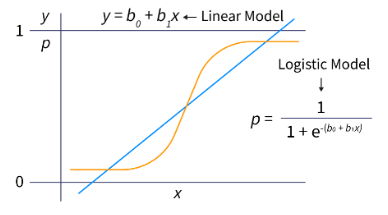

The blue line is the linear function (unbounded, goes from −∞ to +∞).

The orange S-curve is the logistic (sigmoid) function that converts it into probabilities between 0 and 1.

This curve is steepest around 0.5, which is why logistic regression is sensitive near the decision boundary.

In [ ]:
# logistic regression
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train_preprocessed, y_train)

In [ ]:
y_pred_log_reg = log_reg_model.predict(X_test_preprocessed)

In [ ]:
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy: {accuracy_log_reg:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# **Decision Tree Classifier**

What is a Decision Tree?
- A decision tree is a supervised learning algorithm used for classification and regression problems.
- It mimics human decision-making by asking a sequence of questions (splits) and following the path until a final decision (prediction) is made.
- Think of it like a flowchart where each node asks a question, branches represent answers, and leaves give the outcome.

How Splitting Works?
- The tree uses criteria to decide the best split:

1. Gini Impurity – measures how mixed the classes are.

2. Entropy / Information Gain – measures how much uncertainty is reduced by the split.

3. Variance Reduction – for regression trees.

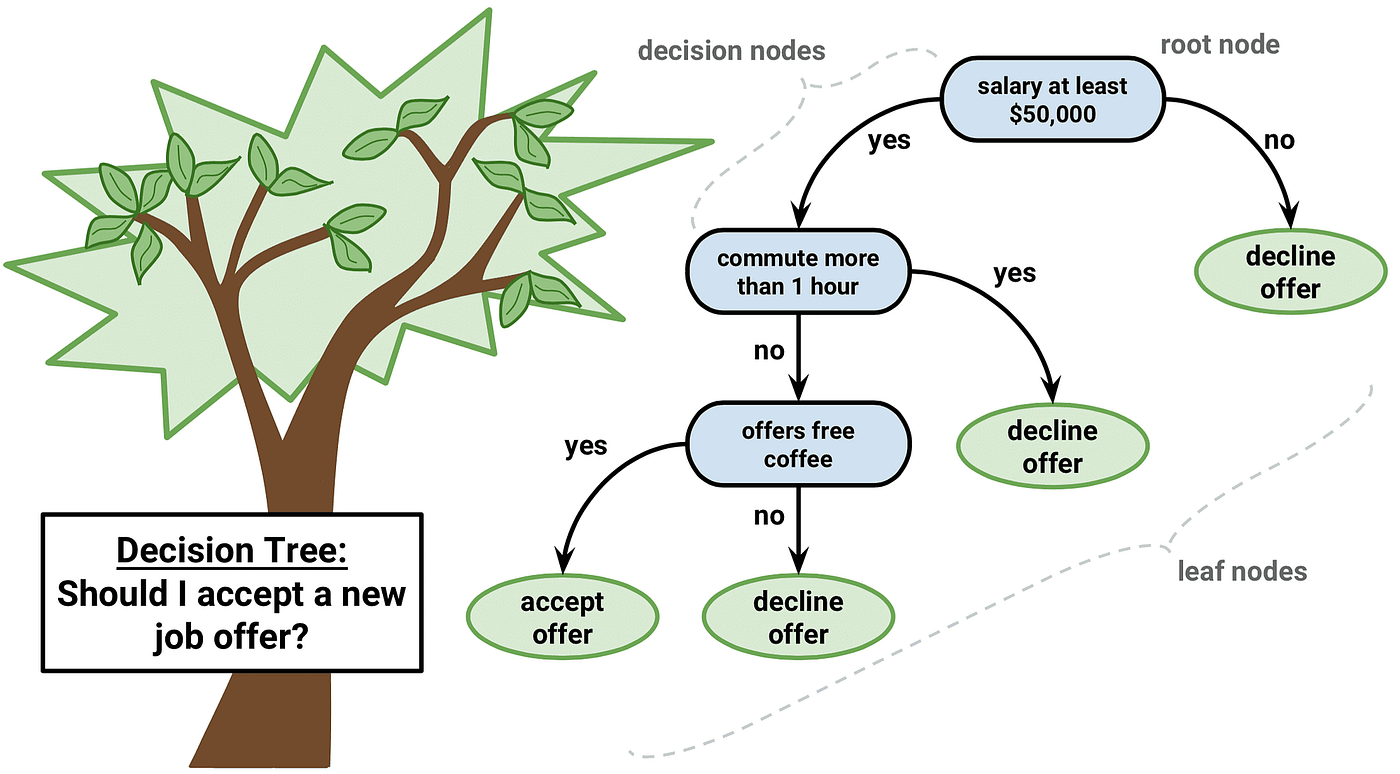

👉 Example:

If you’re predicting whether a person will accept a job offer:

First split could be on Salary (atleast $50,000 or no?).

Then you might split on duration to commute to the office.

Finally, you reach a leaf node like “Job Offer = Accept.”

In [ ]:
# decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_preprocessed, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test_preprocessed)

In [ ]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Accuracy: 0.9923

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       403
           1       1.00      1.00      1.00       566
           2       0.99      1.00      0.99      1736
           3       1.00      1.00      1.00       295

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000


Confusion Matrix:
[[ 388    0   15    0]
 [   0  566    0    0]
 [   8    0 1728    0]
 [   0    0    0  295]]


# **Random Forest Classifier**

A Random Forest is simply a collection (ensemble) of many decision trees working together.

Instead of relying on one tree (which may overfit or be unstable), Random Forest combines the results of multiple trees to make a stronger, more accurate, and more stable model.

It’s an example of an ensemble learning method (specifically, bagging).

How It Works

1. Bootstrapping (Sampling with Replacement):

- Each tree is trained on a random sample of the training data.

- This ensures diversity among trees.

2. Random Feature Selection:

- At each split, instead of considering all features, each tree looks at only a random subset of features.

- This prevents one dominant feature from always driving the splits.

3. Voting (Classification):

- Each tree gives a class prediction.

- The final class is chosen by majority vote.

4. Averaging (Regression):

- If it’s regression, predictions are averaged instead of voting.

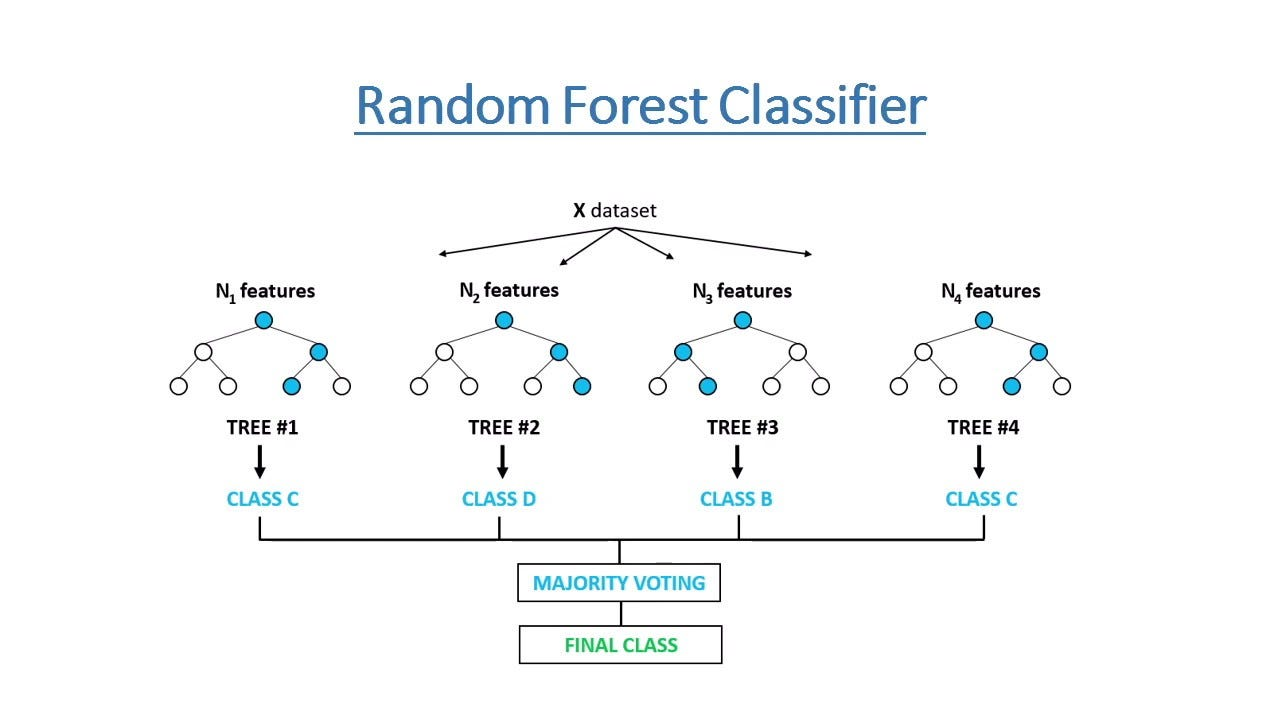

In [ ]:
# random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_preprocessed, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test_preprocessed)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9917

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       403
           1       1.00      1.00      1.00       566
           2       0.99      1.00      0.99      1736
           3       1.00      1.00      1.00       295

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000


Confusion Matrix:
[[ 385    0   18    0]
 [   0  566    0    0]
 [   7    0 1729    0]
 [   0    0    0  295]]


# **XGBoost**

XGBoost is an advanced implementation of Gradient Boosted Decision Trees (GBDT).

Unlike Random Forest (which builds trees independently in parallel), XGBoost builds trees sequentially, where each new tree tries to fix the mistakes of the previous ones.

It’s optimized for speed, performance, and scalability → that’s why it dominates Kaggle competitions.

How It Works

1. Initialization:

- Start with a base prediction (e.g., average of target values).

2. Additive Training

- Build the first tree → predict residuals (errors).

- Add this tree’s predictions to the model.

3. Sequential Learning

- Build the next tree on updated residuals.

- Continue until max trees or minimum error reached.

4. Regularization

- XGBoost includes penalties for model complexity → prevents overfitting (unlike plain Gradient Boosting).

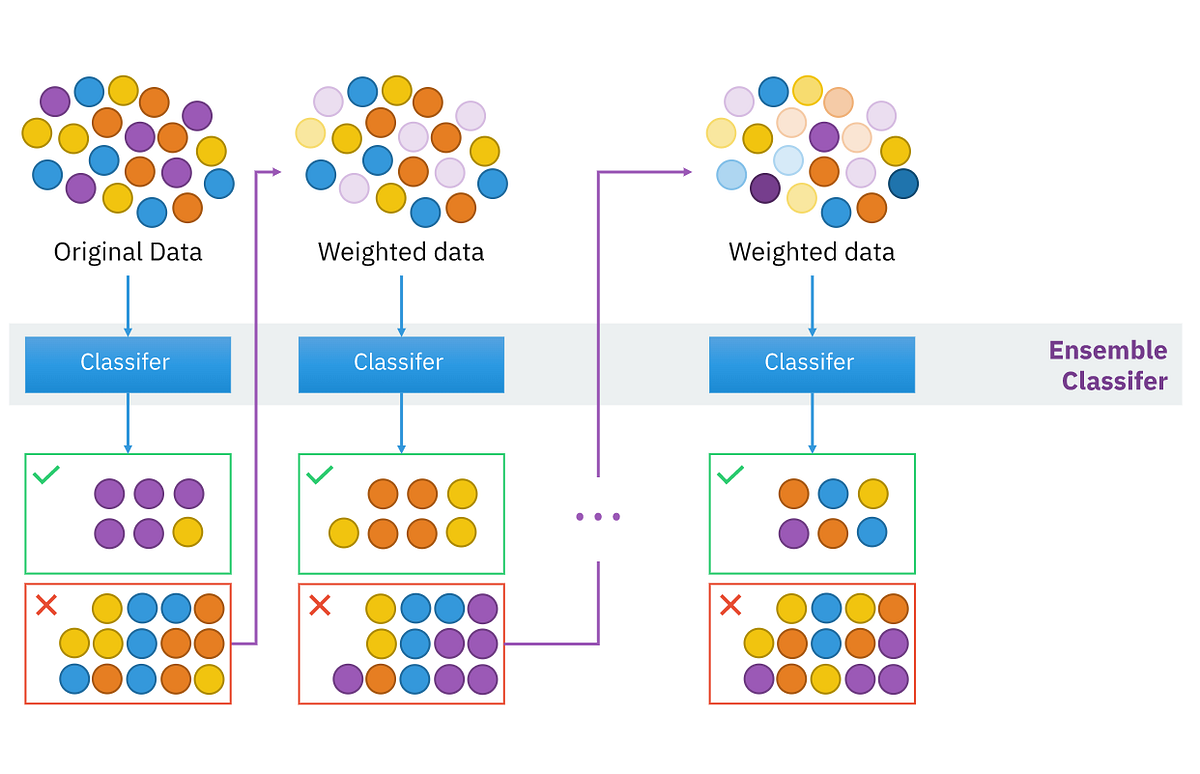

In [ ]:
# xg boost
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train_preprocessed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_preprocessed)

In [ ]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.9917

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       403
           1       1.00      1.00      1.00       566
           2       0.99      0.99      0.99      1736
           3       1.00      1.00      1.00       295

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000


Confusion Matrix:
[[ 388    0   15    0]
 [   0  566    0    0]
 [  10    0 1726    0]
 [   0    0    0  295]]


# **Evaluation Metrics**

## 1. Confusion Metrics
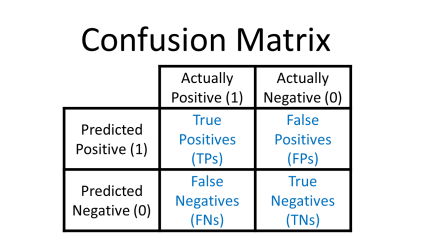

All the other metrics are derived from this matrix.

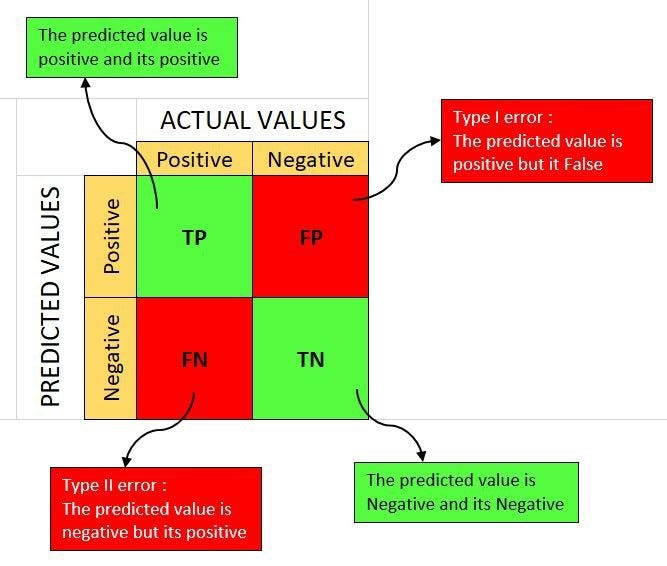


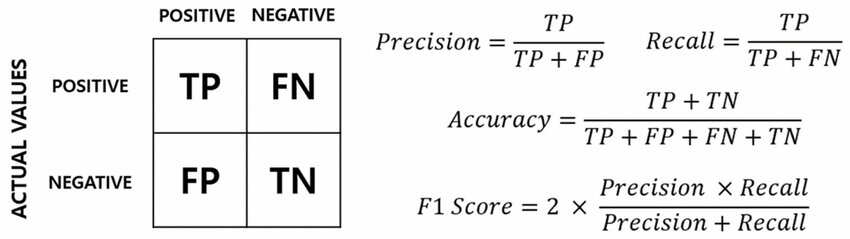

## 2. Accuracy
- Accuracy is the ratio of correct predictions to the total number of predictions. It is easy to understand but can be misleading for imbalanced datasets, where one class is more frequent than others.
- Use when the dataset is balanced and all classes are equally important.

## 3. Precision
- Precision measures the correctness of positive predictions. It is the ratio of true positives to all predicted positives. High precision indicates a low rate of false positives.
- Use when the cost of a false positive is high. For example, in spam email detection, high precision is crucial because misclassifying a legitimate email as spam is more costly than letting some spam through.

## 4. Recall
- Recall, also known as sensitivity, measures the model's ability to find all the actual positive instances. It is the ratio of true positives to all actual positives and reflects a low rate of false negatives.
-  Use when the cost of a false negative is high. For example, in medical screening for a serious disease, high recall is critical to avoid missing any positive cases.

## 5. F1-Score
- The F1 score is the harmonic mean of precision and recall. It provides a single score that balances the trade-off between the two metrics and is especially useful for imbalanced datasets.
- Use when you need a balance between precision and recall, especially with imbalanced classes, to gain a more complete picture of your model's performance.

# **Conclusion**

Based on the accuracies we've calculated:

*   **Logistic Regression:** 99.07%
*   **Decision Tree:** 99.23%
*   **Random Forest Classifier:** 99.17%
*   **XGBoost:** 99.17%

Based on these results, the **Decision Tree Classifier** achieved the highest accuracy (99.23%) on your test set.

**Why we should choose the Decision Tree Classifier:**

*   **Highest Accuracy:** It performed slightly better than the other models in terms of overall accuracy on this specific dataset.
*   **Interpretability:** Decision trees are generally easier to interpret than ensemble methods like Random Forest and XGBoost. You can visualize the tree to understand how decisions are being made.

**However, consider these points:**

*   **Marginal Difference:** The difference in accuracy between the models is very small (less than 0.2%). In a real-world scenario, this difference might not be significant.
*   **Other Metrics:** While accuracy is a good starting point, it's important to look at other metrics like precision, recall, and F1-score, especially if your dataset were imbalanced. In this case, all models show high precision, recall, and F1-scores across all classes, indicating strong performance overall.
*   **Overfitting:** A single Decision Tree can be prone to overfitting, especially on complex datasets. While it performed well here, for other datasets, ensemble methods like Random Forest or XGBoost might be more robust due to their ability to reduce variance.

**In conclusion:** For this specific dataset, the Decision Tree Classifier is the best performing model based on accuracy. Given the high performance across all models and the dataset characteristics, the Decision Tree's interpretability might make it a good choice. However, if we were working with a more complex or imbalanced dataset, further investigation into ensemble methods and other evaluation metrics would be essential.